# What's in a CCD image?

CCDs collect light on top of a few backgrounds.

Data Reduction is the process of getting the measurement of interest out of a CCD image.

When we take pictures of stars, they look like this:

In [1]:
from astropy.io import fits

In [2]:
hdu = fits.open('target_image.FIT')[0]

In [3]:
import pylab as pl
pl.rcParams['figure.figsize'] = (10,6)
pl.style.use('dark_background')
from astropy.visualization import simple_norm

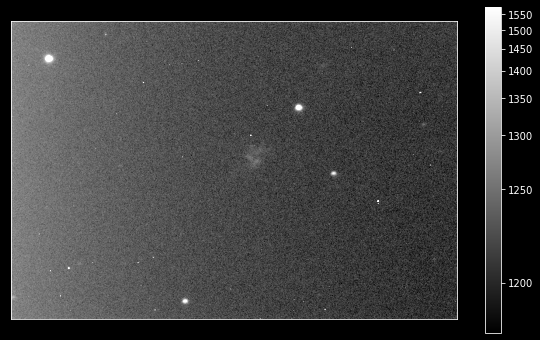

In [4]:
pl.imshow(hdu.data, cmap='gray', norm=simple_norm(hdu.data,
                                                  stretch='asinh',
                                                  min_percent=1, max_percent=99.95))
pl.colorbar()
_=pl.xticks([])
_=pl.yticks([])

One of our goals in _data reduction_ is removing the background and extracting only the starlight.

We can look at this more closely...

Note that the star is a bright patch, but the background isn't zero!

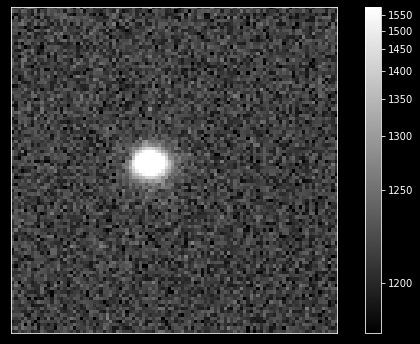

In [5]:
pl.imshow(hdu.data[100:200,450:550], 
          cmap='gray', norm=simple_norm(hdu.data, stretch='asinh', min_percent=1, max_percent=99.95))
pl.colorbar()
_=pl.xticks([])
_=pl.yticks([])

To make this a little clearer, we look at a profile through the star - a plot of flux vs pixel number.

The background isn't zero, it's a mix of *bias* plus *dark current* plus *sky background*.

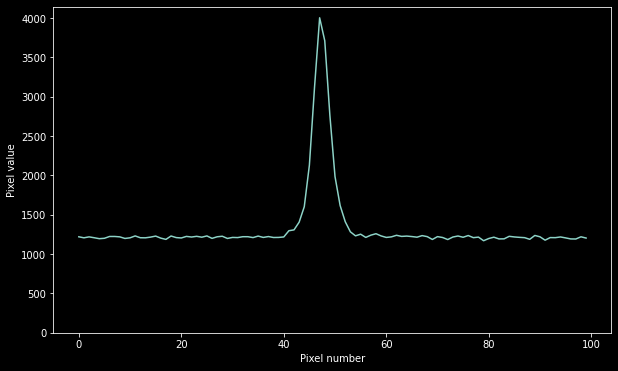

In [6]:
_=pl.plot(hdu.data[100:200, 491])
_=pl.ylim(0, pl.ylim()[1])
_=pl.xlabel("Pixel number")
_=pl.ylabel("Pixel value")

Let's look at just the background:

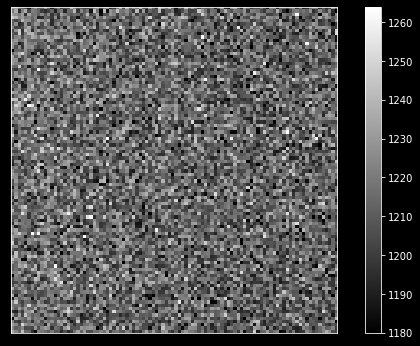

In [7]:
pl.imshow(hdu.data[300:400,430:530], 
          cmap='gray', norm=simple_norm(hdu.data[300:400,430:530], min_percent=1, max_percent=99.95))
pl.colorbar()
_=pl.xticks([])
_=pl.yticks([])

You can see, by looking at the colorbar, that the background is around 1180-1260 counts, probably somewhere in the middle.

We know this is only background because we don't see any stars in it, otherwise we can't tell the difference between bias, dark, and sky.

In the CCD notebook (and the CCD characterization lab), we're trying to get better estimates of that background level.

In [8]:
data = hdu.data[300:400,430:530]

In [9]:
print(f"Mean={data.mean()}, median={np.median(data)},"
      f"standard deviation={data.std():0.2f}={np.std(data):0.2f}")

Mean=1213.6575, median=1213.0,standard deviation=14.46=14.46


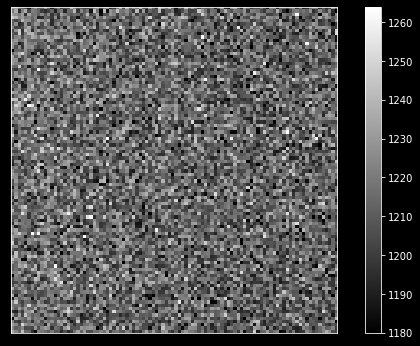

In [10]:
pl.imshow(hdu.data[300:400,430:530], 
          cmap='gray', norm=simple_norm(hdu.data[300:400,430:530], min_percent=1, max_percent=99.95))
pl.colorbar()
_=pl.xticks([])
_=pl.yticks([])

We look at histograms to see counts of how many pixels have each value:

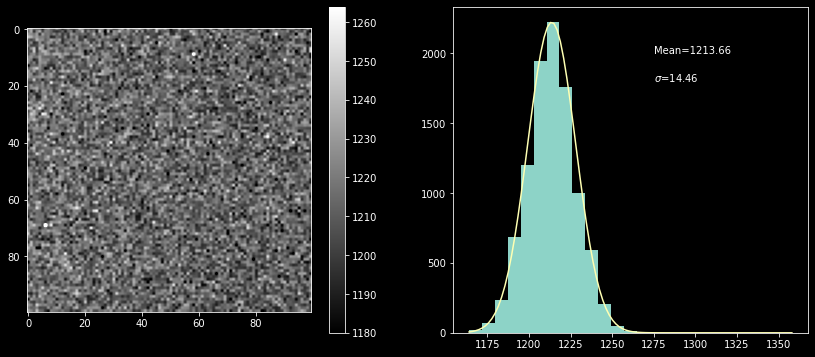

In [11]:
pl.figure(figsize=(14,6))
pl.subplot(1,2,1)
pl.imshow(hdu.data[300:400,430:530], 
          cmap='gray', norm=simple_norm(hdu.data[300:400,430:530], min_percent=1, max_percent=99.95))
pl.colorbar()
pl.subplot(1,2,2)
h,l,p=pl.hist(data.ravel(), bins=25)
x=np.linspace(data.min(), data.max(), 100)
_=pl.plot(x, h.max()*np.exp(-(x-data.mean())**2/(2*np.var(data))))
_=pl.text(1275, 2000, f"Mean={data.mean():0.2f}")
_=pl.text(1275, 1800, f"$\sigma$={data.std():0.2f}")

What's in this background image?  Three components:

 * Bias
 * Dark Current
 * Sky Background

We can measure the _dark current_ and the _bias_ in the lab. 

The bias is _approximately_ constant from one day to the next.

The dark current _rate_ is also _approximately_ constant at a given detector temperature.

Data Reduction involves getting rid of the parts of the target image we are _not_ interested in.

The simplest version of this is just subtracting off a dark frame with exactly the same exposure time as the on-sky frame

In [12]:
light_data = fits.getdata('target_image.FIT')
dark_data = fits.getdata('dark_10s_001.FIT')
light_minus_dark = light_data - dark_data

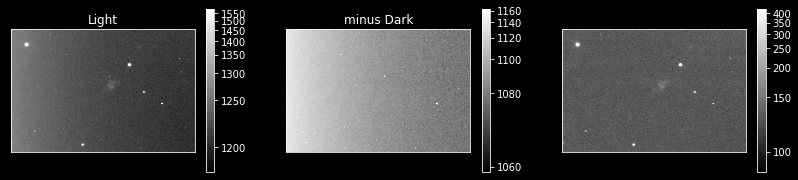

In [13]:
pl.figure(figsize=(14,3))
_=pl.subplot(1,3,1).imshow(light_data, cmap='gray',
                           norm=simple_norm(light_data,
                                            stretch='asinh',
                                            min_percent=1, max_percent=99.95))
pl.title("Light")
pl.colorbar(mappable=_)
_=pl.xticks([])
_=pl.yticks([])

_=pl.subplot(1,3,2).imshow(dark_data, cmap='gray',
                           norm=simple_norm(dark_data,
                                            stretch='asinh',
                                            min_percent=1, max_percent=99.95))
pl.colorbar(mappable=_)

_=pl.xticks([])
_=pl.yticks([])
pl.title("minus Dark")
_=pl.subplot(1,3,3).imshow(light_minus_dark, cmap='gray', norm=simple_norm(light_minus_dark,
                                                                           stretch='asinh',
                                                                           min_percent=1, max_percent=99.95))
pl.colorbar(mappable=_)
_=pl.xticks([])
_=pl.yticks([])

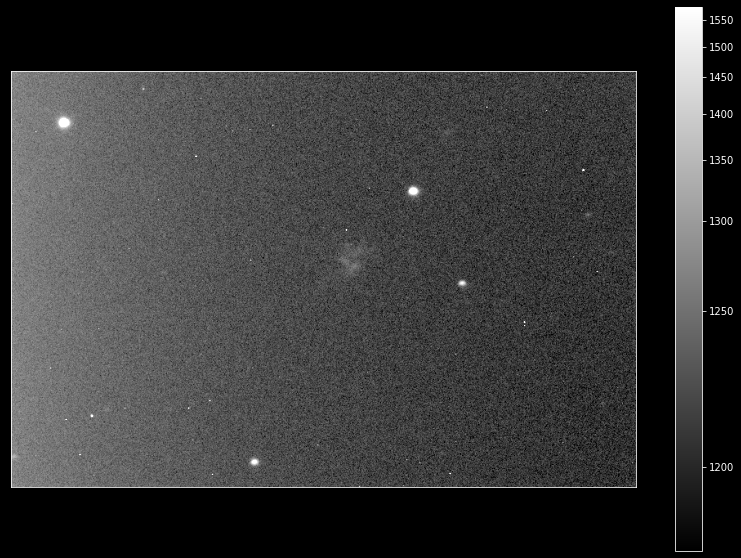

In [14]:
pl.figure(figsize=(14,10))
pl.imshow(light_data, cmap='gray',
          norm=simple_norm(light_data, stretch='asinh', min_percent=1, max_percent=99.95))
pl.colorbar()
_=pl.xticks([])
_=pl.yticks([])

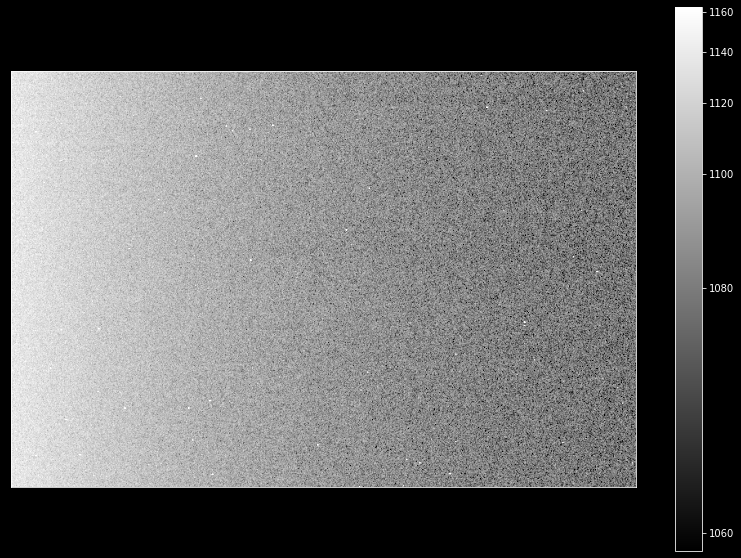

In [15]:
pl.figure(figsize=(14,10))
pl.imshow(dark_data, cmap='gray', 
          norm=simple_norm(dark_data,
                           stretch='asinh', min_percent=1, max_percent=99.95))
pl.colorbar()
_=pl.xticks([])
_=pl.yticks([])

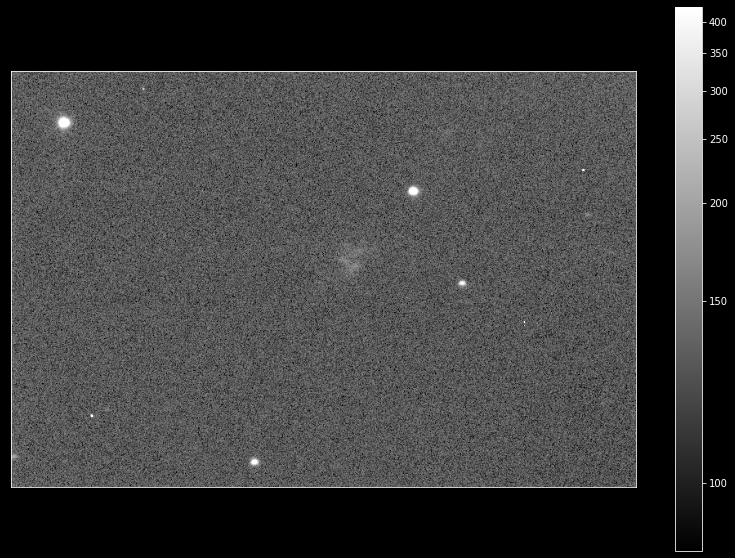

In [16]:
pl.figure(figsize=(14,10))
pl.imshow(light_minus_dark, cmap='gray',
          norm=simple_norm(light_minus_dark,
                           stretch='asinh',
                           min_percent=1, max_percent=99.95))
pl.colorbar()
_=pl.xticks([])
_=pl.yticks([])

END